# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала. 

<!-- 
## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла? 

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg? -->


<!-- ### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib. -->

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

### 1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

# YOUR ANSWER HERE
В .wav файле хранятся оцифрованные аудиосигналы в несжатом формате,
 представленные в виде последовательности битов. 
 Также в нем содержится метаинформация о количестве отсчетов
  для каждого канала, частоте дискретизации, числе каналов 
  и глубине квантования (числе бит на один отсчет). 
знать параметры можно, например, с помощью библиотеки 
wave для Python или через веб-инструмент GroupDocs.

### 2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

**Подсказка**

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

При изменении частоты дискретизации для меня стало сложно разбирать человеческую
речь на уровне 20 кГц, а невозможно на уровне 10 кГц и ниже

Частота дискретизации:  44100
Длина сигнала:  213342


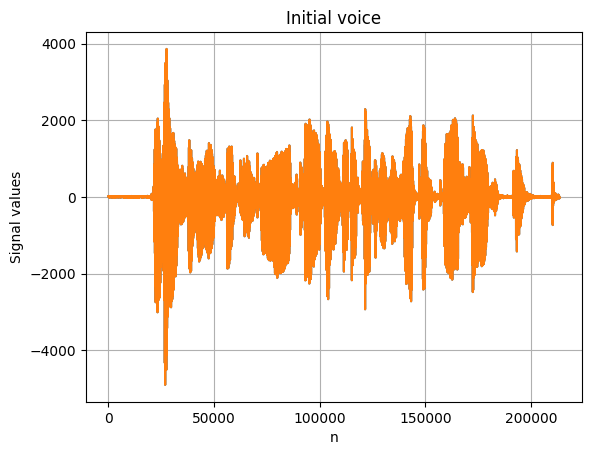

Новая частота дискретизации:  25000
Новая длина сигнала:  213342


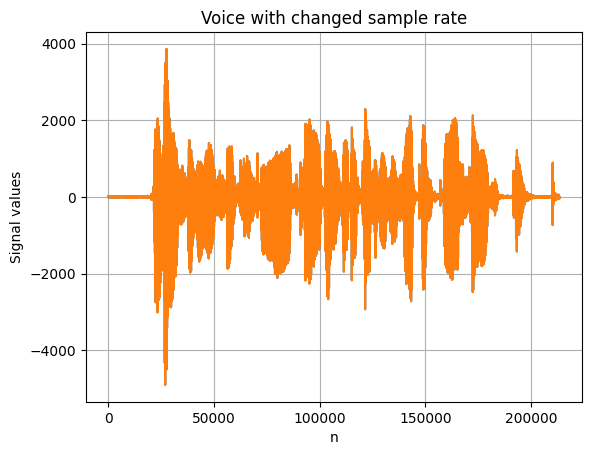

In [2]:
import numpy as np
from scipy.io import wavfile
from scipy.fftpack import fft
import matplotlib.pyplot as plt


Fs, signal = wavfile.read('resources/Julia_voice.wav')
signal_len = len(signal)
print("Частота дискретизации: ", Fs)
print("Длина сигнала: ", signal_len)

plt.plot(np.linspace(0, signal_len - 1, signal_len), signal)
plt.xlabel('n')
plt.ylabel('Signal values')
plt.title('Initial voice')
plt.grid()
plt.show()
wavfile.write('resources/Julia_voice_new.wav', 25000, signal)
Fs_new, new_signal = wavfile.read('resources/Julia_voice_new.wav')
new_signal_len = len(new_signal)
print("Новая частота дискретизации: ", Fs_new)
print("Новая длина сигнала: ", new_signal_len)

plt.plot(np.linspace(0, new_signal_len - 1, new_signal_len), new_signal)
plt.xlabel('n')
plt.ylabel('Signal values')
plt.title('Voice with changed sample rate')
plt.grid()
plt.show()


### 3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?

# YOUR ANSWER HERE
форматы .mp3 .ogg используют сжатие исходного сигнала в целях
уменьшения размера файлов. формат wav не сжимает файлы
 и сохраняет их звук в высоком качестве

# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону. 

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время. 


In [3]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round())//10*10, 
                         (data.max().round())//10*10+10, step=5))
    plt.grid(which='major',
        color = 'k', 
        linewidth = 1)
    plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
    plt.show()

In [4]:
# Читаем данные с подготовленными сигналами
import pickle
with open("resources/data.pickle", "rb") as f:
    test_data = pickle.load(f)
    signal_a = test_data['task2']['a']
    signal_b = test_data['task2']['b']
    signal_c = test_data['task2']['c']
# Теперь можно приступать к практике!
T_a = 0
T_b = 0
for i, value in enumerate(signal_a[1:]):
    if value == signal_a[0]:
        T_a = i + 1
        break
for i, value in enumerate(signal_b[1:]):
    if abs(value - signal_b[0]) < 1e-6:
        T_b = 2 * (i + 1 + 0.05)
        break
print("T_a = ", T_a)
print("T_b = ", T_b)

T_a =  425
T_b =  100.1


## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

### Сигнал ***a***

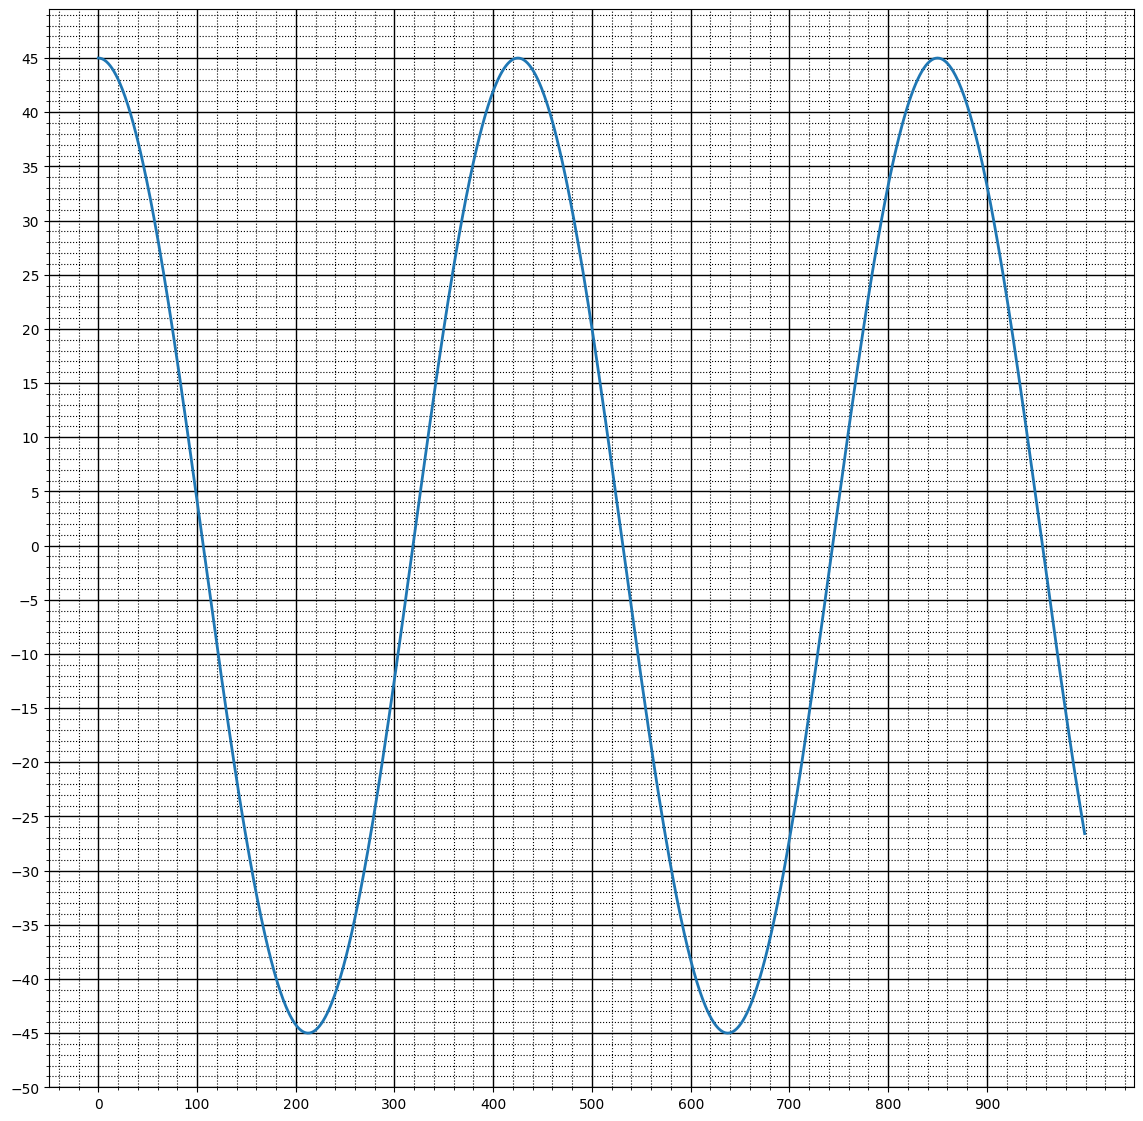

In [5]:
draw_signal(test_data['task2']['a'])

In [6]:
# YOUR CODE HERE
a = 45 * np.cos(np.linspace(0, 1000, 1000) * 0.01475)

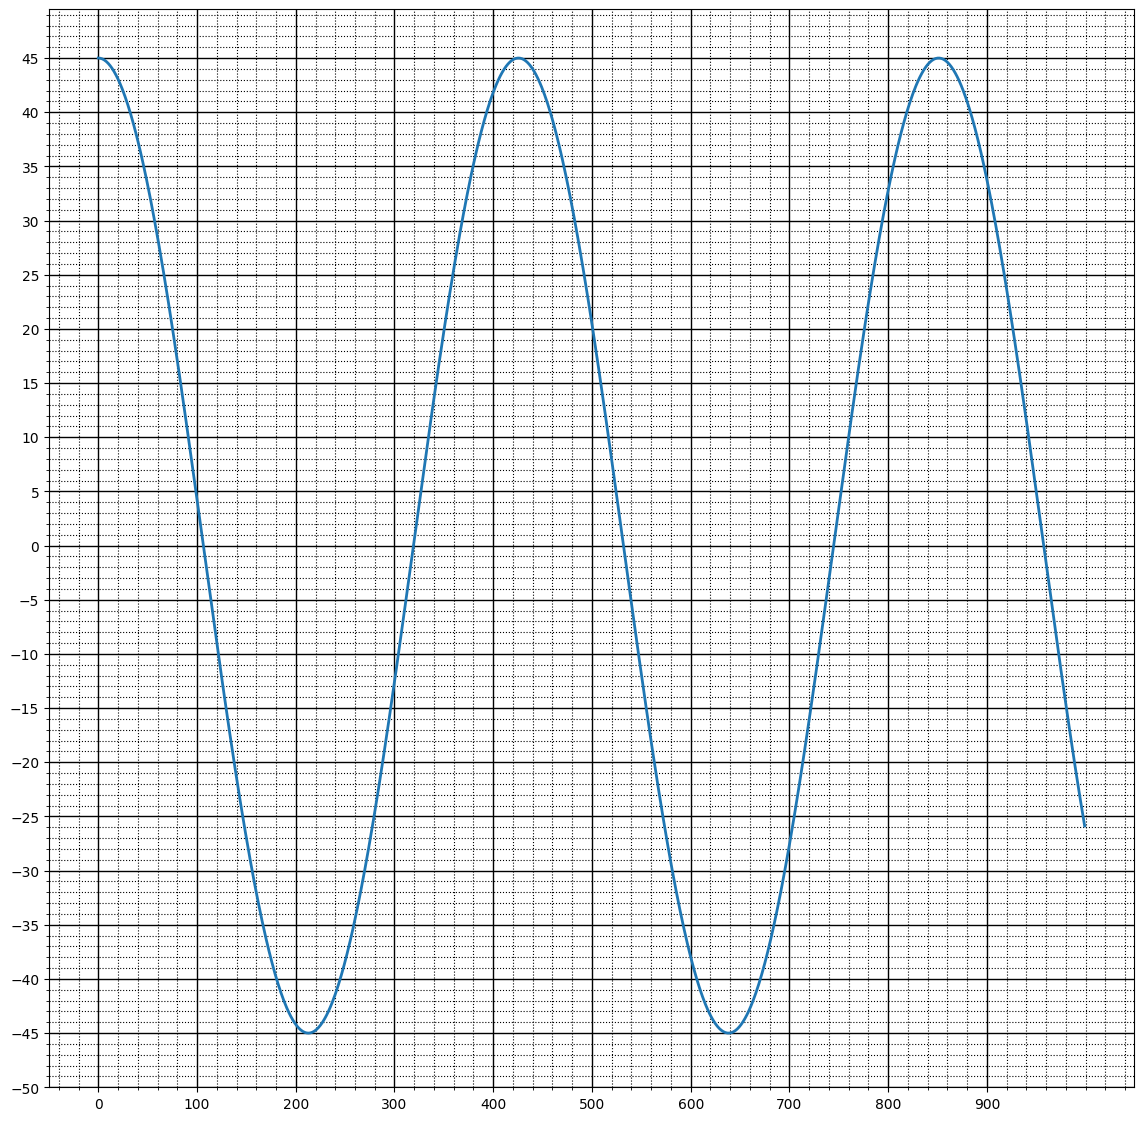

In [7]:
draw_signal(a)

In [8]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'a':**

1. Амплитуда - $A= 45$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = 0.01475$

3. Фаза - $\phi= 0$

### Сигнал ***b***

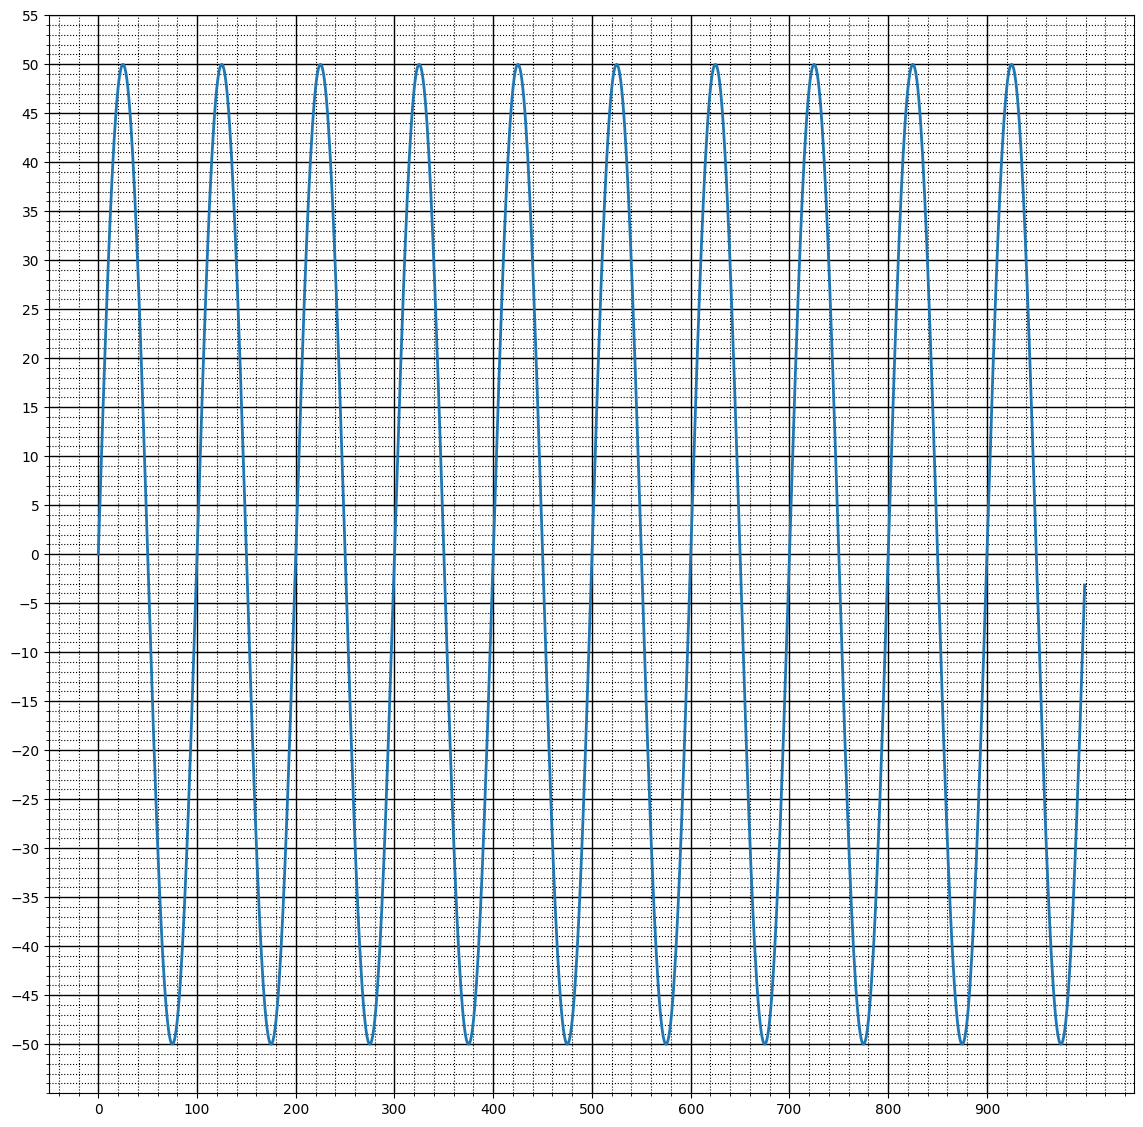

In [9]:
draw_signal(test_data['task2']['b'])

In [10]:
# YOUR CODE HERE
b = 50 * np.sin(np.linspace(0, 1000, 1000) * 2 * np.pi / T_b)

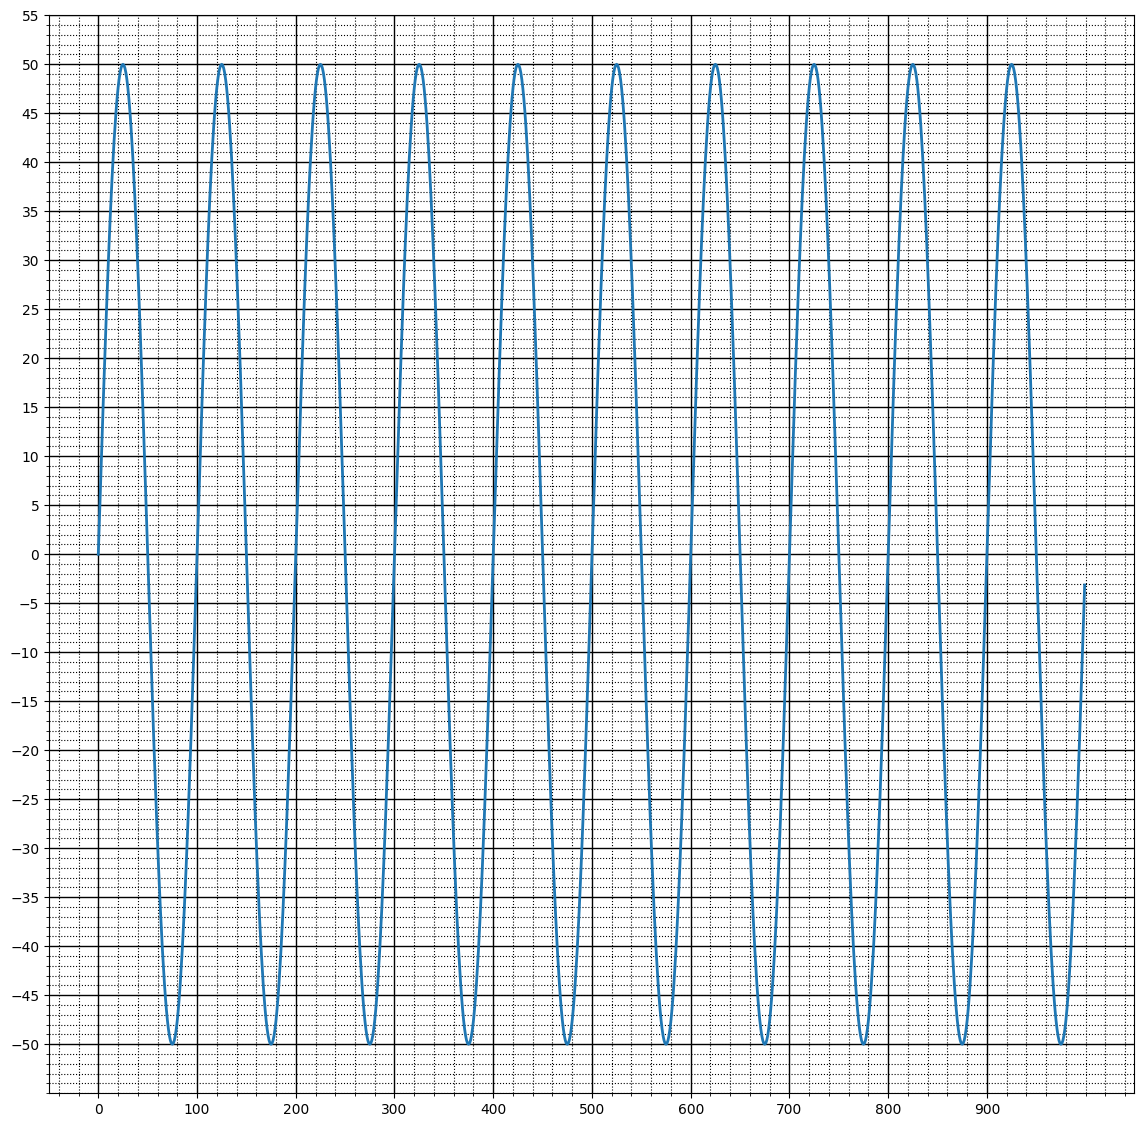

In [11]:
draw_signal(b)

In [12]:
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'b':**

1. Амплитуда - $A= $

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = $

3. Фаза - $\phi= $

### Сигнал ***c***

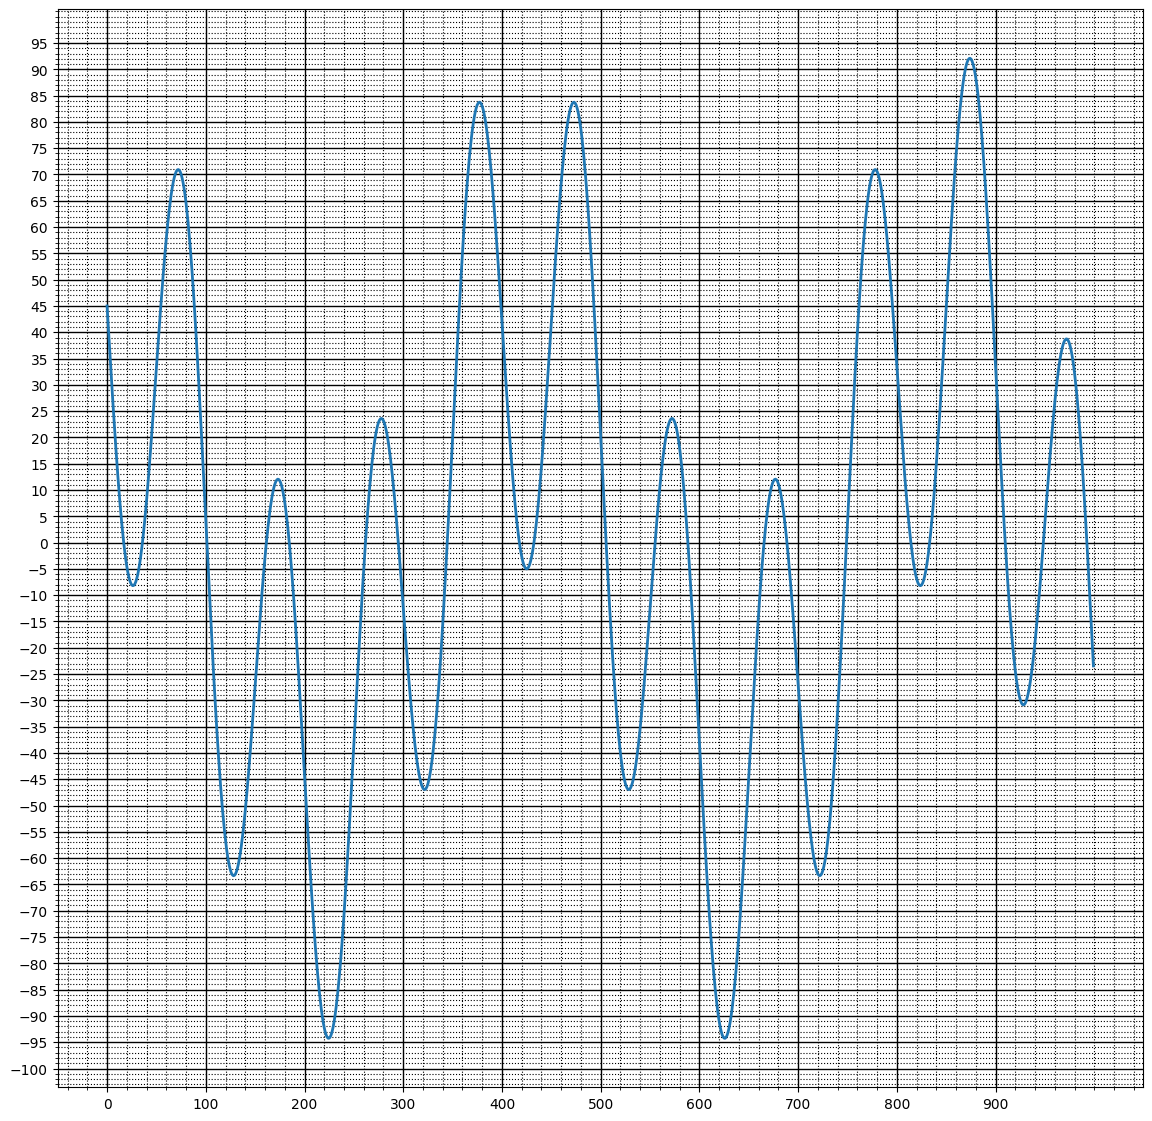

In [13]:
draw_signal(test_data['task2']['c'])

17.335534014626674
10.659611172660155
4.561975056269389
23.785542394177778


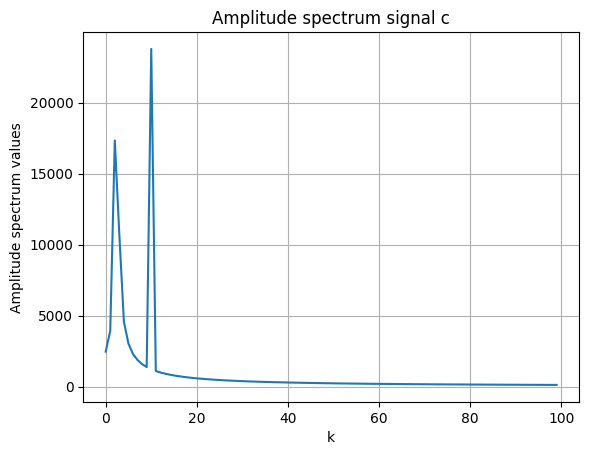

1.0390835651046295
-1.9399793215437988
-1.8481655025143087
1.5752673778471578


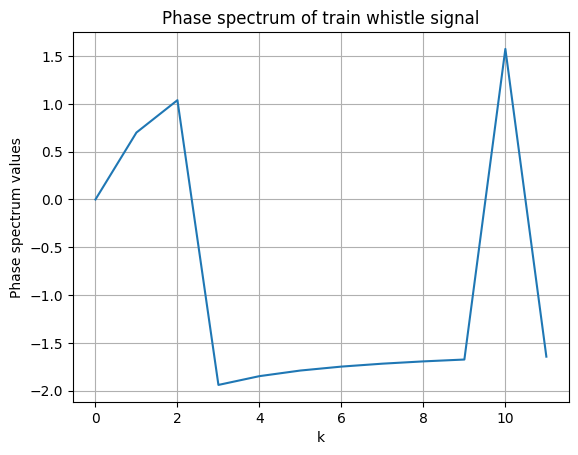

In [14]:
# сигнал состоит из двух гармоник
# YOUR CODE HERE
from scipy.fftpack import fft
S = fft(signal_c)
signal_c_len = len(signal_c)
# The calculation of the amplitude spectrum 
AS = np.abs(S)
print(AS[2]/1000)
print(AS[3]/1000)
print(AS[4]/1000)
print(AS[10]/1000)

plt.plot(AS[0:100])
plt.xlabel('k')
plt.ylabel('Amplitude spectrum values')
plt.title('Amplitude spectrum signal c')
plt.grid()
plt.show()

PhS = np.arctan2(np.imag(S), np.real(S))
print(PhS[2])
print(PhS[3])
print(PhS[4])
print(PhS[10])

plt.plot(PhS[0:12])
plt.xlabel('k')
plt.ylabel('Phase spectrum values')
plt.title('Phase spectrum of train whistle signal')
plt.grid()
plt.show()

In [15]:
c = a - b

In [16]:
assert len(c)== 1000
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

Ok!


# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

<!-- ![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution") -->
![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution")

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [17]:
import scipy
def convolve(in1, in2):
    in1_mod = np.zeros(len(in1) + 2 * len(in2) - 2)
    in1_mod[len(in2)-1:len(in1_mod)-len(in2)+1] = in1
    in2_mod = in2[::-1]
    conv = np.zeros(len(in1) + len(in2) - 1)
    for i in range(len(in1) + len(in2) - 1):
        for j in range(len(in2_mod)):
            conv[i] += in2_mod[j] * in1_mod[i+j]
    del in1_mod
    del in2_mod
    return conv
    #YOUR CODE HERE

In [18]:
def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [19]:
a = np.repeat([0,1,0], 10)
b = np.array([0,1,2,3,2,1,0])

In [20]:
test_convolve(a, b, print_debug=False)

Ok!


In [21]:
print(len(convolve(a,b)))

36


### Нарисуйте результат свертки a и b

Сигнал **а**

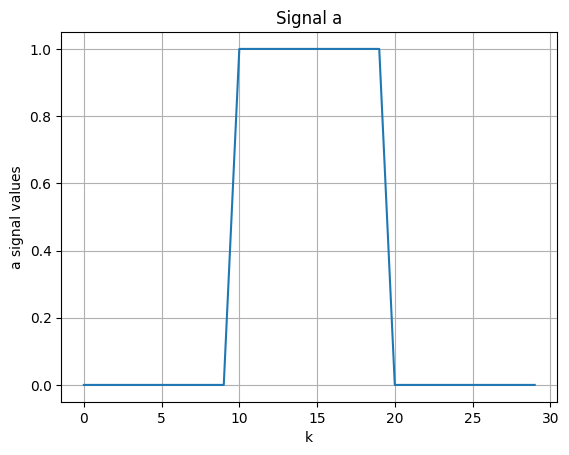

In [22]:
# YOUR CODE HERE
plt.plot(np.linspace(0, len(a)-1, len(a)), a)
plt.xlabel('k')
plt.ylabel('a signal values')
plt.title('Signal a')
plt.grid()
plt.show()

Сигнал **b**

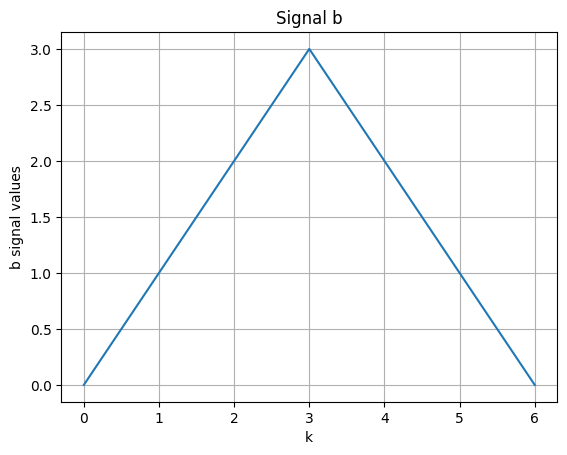

In [23]:
# YOUR CODE HERE
plt.plot(np.linspace(0, len(b)-1, len(b)), b)
plt.xlabel('k')
plt.ylabel('b signal values')
plt.title('Signal b')
plt.grid()
plt.show()

Свертка **a** и **b**

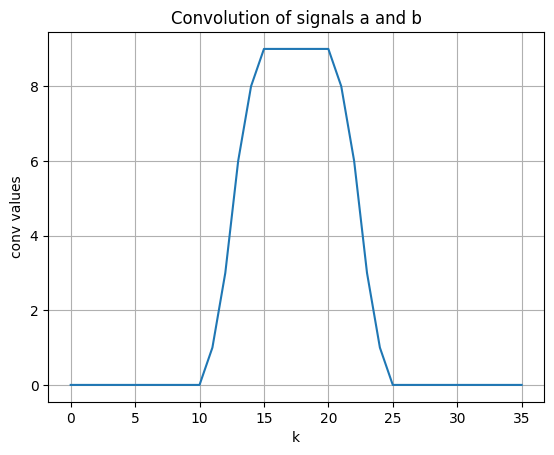

In [24]:
# YOUR CODE HERE
plt.plot(np.linspace(0, len(convolve(a,b))-1, len(convolve(a,b))),convolve(a, b))
plt.xlabel('k')
plt.ylabel('conv values')
plt.title('Convolution of signals a and b')
plt.grid()
plt.show()

Все 3 графика на одной картинке:

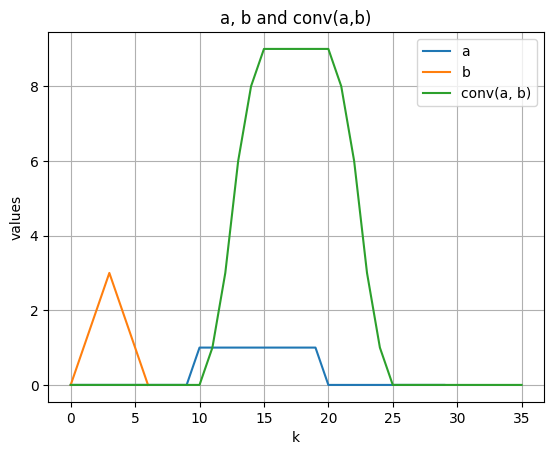

In [25]:
# YOUR CODE HERE
plt.plot(np.linspace(0, len(a)-1, len(a)), a, '', np.linspace(0, len(b)-1, len(b)), b, '', np.linspace(0, len(convolve(a,b))-1, len(convolve(a,b))),convolve(a, b))
plt.xlabel('k')
plt.ylabel('values')
plt.title('a, b and conv(a,b)')
plt.legend(['a', 'b', 'conv(a, b)'])
plt.grid()
plt.show()

# Задание 4. * Алгоритм Карплуса-Стронга 

Реализуйте  [Алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчетов. Проверьте результат. 

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

In [26]:
def karplus_strong(noise, N):
    # Noise - input
    # N - number of samples to generate
    # return y - generated signal based on Noise 
    # YOUR CODE HERE
    alpha = 0.5
    samples = np.zeros(int(44100*2))
    for i in range(len(noise)):
        samples[i] = noise[i]
    for i in range(len(noise), len(samples)):
        samples[i] = alpha * (samples[i-len(noise)]+samples[i-len(noise)-1])
 
    return samples

    raise NotImplementedError()

In [27]:
np.random.seed(seed=1)
sample_rate = 44100 
frequency = 82.41
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
assert np.allclose(gen_wav[:len(noise)], noise), "Generated signal must starting with noise"
assert np.allclose(gen_wav[len(noise)], (noise[0])/2), "Out of range samples eq 0."
assert np.allclose(gen_wav[len(noise)+1: 2*len(noise)], (noise[:-1] + noise[1:])/2), \
    "Bad requrent rule( 1 iteration)"
assert np.allclose(gen_wav[2*len(noise)], (noise[0]/2 + noise[-1])/2), \
    "Bad requrent rule( 2 iteration)"
assert np.allclose(gen_wav[2*len(noise)+2: 3*len(noise)], \
                   (((noise[:-1] + noise[1:])/2)[:-1] + ((noise[:-1] + noise[1:])/2)[1:])/2), \
    "Bad requrent rule( 3 iteration)"
print('All Ok!')

All Ok!


### Попробуем покрутить параметры генерации

Сгенерируем гитарные ноты:

In [28]:
# YOUR CODE HERE
E_freq = 82.41
A_freq = 110.00
d_freq = 146.83
g_freq = 196.00
b_freq = 246.94
e_freq = 329.63

noise_E = (2 * np.random.uniform(-1, 1, int(sample_rate/E_freq))) # [-1, 1]
noise_A = (2 * np.random.uniform(-1, 1, int(sample_rate/A_freq))) # [-1, 1]
noise_d = (2 * np.random.uniform(-1, 1, int(sample_rate/d_freq))) # [-1, 1]
noise_g = (2 * np.random.uniform(-1, 1, int(sample_rate/g_freq))) # [-1, 1]
noise_b = (2 * np.random.uniform(-1, 1, int(sample_rate/b_freq))) # [-1, 1]
noise_e = (2 * np.random.uniform(-1, 1, int(sample_rate/e_freq))) # [-1, 1]

gen_wav_E = karplus_strong(noise, gen_len)
gen_wav_A = karplus_strong(noise, gen_len)
gen_wav_d = karplus_strong(noise, gen_len)
gen_wav_g = karplus_strong(noise, gen_len)
gen_wav_b = karplus_strong(noise, gen_len)
gen_wav_e = karplus_strong(noise, gen_len)

gen_wav_E = gen_wav_E / np.max(np.abs(gen_wav_E))  # Нормируем от -1 до 1
gen_wav_E = np.int16(gen_wav_E * 32767)
scipy.io.wavfile.write("resources/genwav_E.wav", 44100, gen_wav_E)

gen_wav_A = gen_wav_A / np.max(np.abs(gen_wav_A))  # Нормируем от -1 до 1
gen_wav_A = np.int16(gen_wav_A * 32767)
scipy.io.wavfile.write("resources/genwav_A.wav", 44100, gen_wav_A)

gen_wav_d = gen_wav_d / np.max(np.abs(gen_wav_d))  # Нормируем от -1 до 1
gen_wav_d = np.int16(gen_wav_d * 32767)
scipy.io.wavfile.write("resources/genwav_d.wav", 44100, gen_wav_d)

gen_wav_g = gen_wav_g / np.max(np.abs(gen_wav_g))  # Нормируем от -1 до 1
gen_wav_g = np.int16(gen_wav_g * 32767)
scipy.io.wavfile.write("resources/genwav_g.wav", 44100, gen_wav_g)

gen_wav_b = gen_wav_b / np.max(np.abs(gen_wav_b))  # Нормируем от -1 до 1
gen_wav_b = np.int16(gen_wav_b * 32767)
scipy.io.wavfile.write("resources/genwav_b.wav", 44100, gen_wav_b)

gen_wav_e = gen_wav_e / np.max(np.abs(gen_wav_e))  # Нормируем от -1 до 1
gen_wav_e = np.int16(gen_wav_e * 32767)
scipy.io.wavfile.write("resources/genwav_e.wav", 44100, gen_wav_e)

Визуализируем затухание амплитуды:

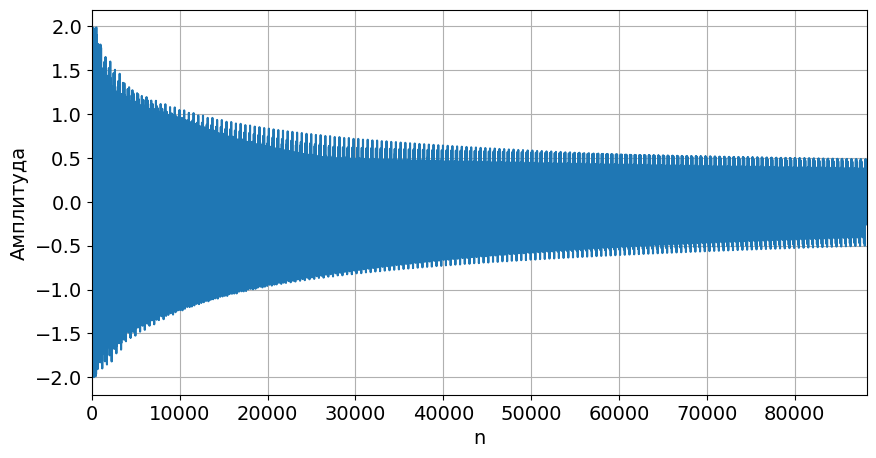

In [29]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len+1, gen_len), gen_wav)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

Визуализируйте затухание амплитуд гитарных нот:

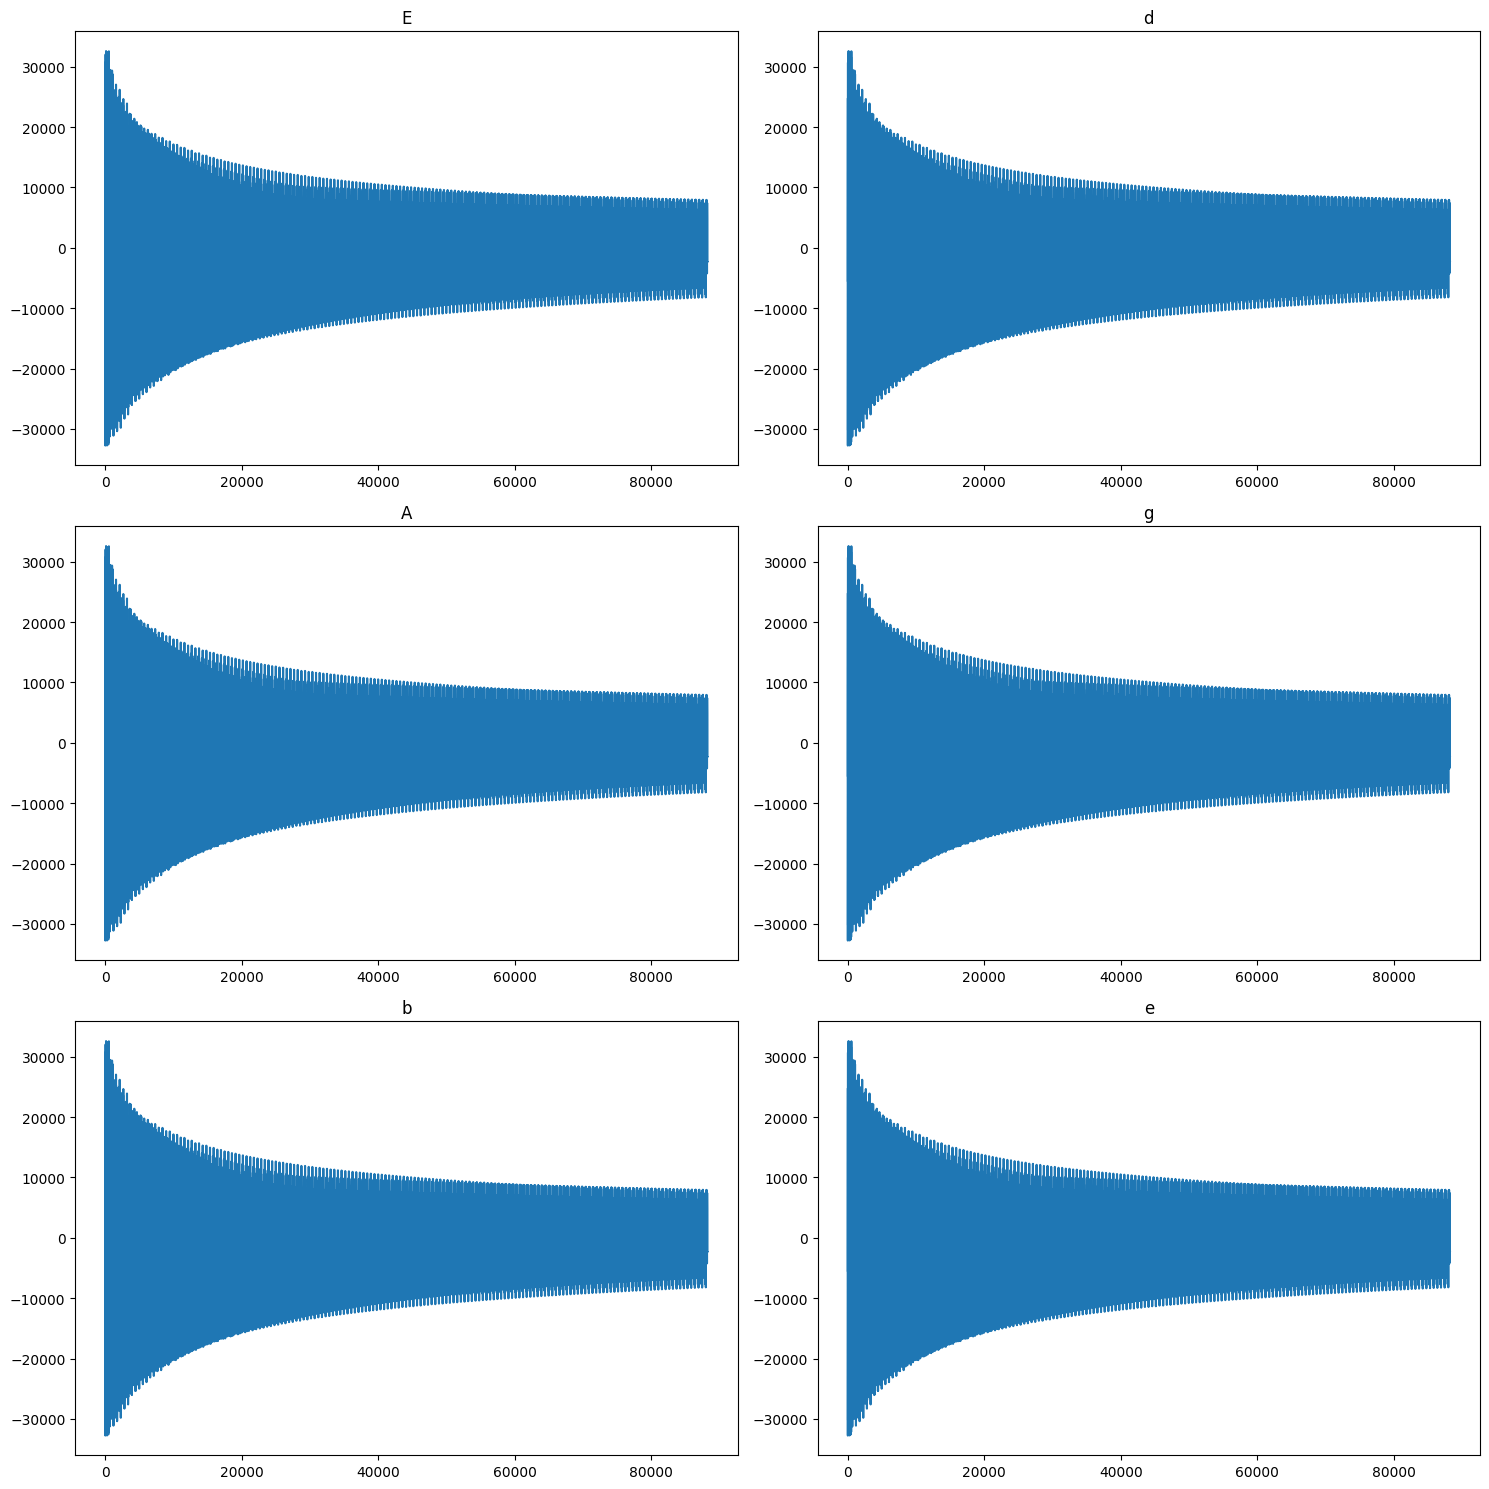

In [30]:
# YOUR CODE HERE
fig, axs = plt.subplots(3, 2, figsize=(15,15))
axs[0, 0].plot(np.linspace(0, gen_len+1, gen_len), gen_wav_E)
axs[0, 0].set_title("E")
axs[1, 0].plot(np.linspace(0, gen_len+1, gen_len), gen_wav_A)
axs[1, 0].set_title("A")
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].plot(np.linspace(0, gen_len+1, gen_len), gen_wav_d)
axs[0, 1].set_title("d")
axs[1, 1].plot(np.linspace(0, gen_len+1, gen_len), gen_wav_g)
axs[1, 1].set_title("g")
axs[2, 0].plot(np.linspace(0, gen_len+1, gen_len), gen_wav_b)
axs[2, 0].set_title("b")
axs[2, 1].plot(np.linspace(0, gen_len+1, gen_len), gen_wav_e)
axs[2, 1].set_title("e")
fig.tight_layout()